
# Python Assignement 
## **Introduction to the Dataset**
**dm_contractor_projects-open**:https://www.dubaipulse.gov.ae/data/dm-contracts/dm_contractor_projects-open.

In this assignment, I have chosen the Contractor Projects data, that includes data on project cost, period, name of contractor, number of buildings, type of project and of locality.
NumPy and Pandas are appropriate tools to analyse this data due to the existence of numerical values (cost, duration, buildings) as well as categorical values (contractor names, community).

**Justification** 

Contractor Projects data set offers important information regarding the construction activities of different communities, including the information concerning the duration of the project, the number of buildings, the names of the contractor, the types of projects, and the structure of costs. This data will be especially useful in the analysis of the tendencies of construction performance, efficiency of contractors, and trends in development of communities.




#### Let us start by importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import requests
import io

In [2]:
!curl -O https://www.dubaipulse.gov.ae/dataset/dm-contractor-projects-open/resource/4639cc77-794e-48b9-98ae-74dc0925ce85/download/dm_contractor_projects-open.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 36.5M  100 36.5M    0     0   958k      0  0:00:39  0:00:39 --:--:-- 1011k


In [3]:
# Load the dataset into a pandas DataFrame
import pandas as pd

df = pd.read_csv("dm_contractor_projects-open.csv")
df.head()


,CONTRACTOR_LICENSE_NO,CONTRACTOR_ENGLISH,PROJECT_NO,PARCEL_ID,PROJECT_TYPE,CONSULTANT_ENGLISH,CONSULTANT_ENGLISH_AR,BUILDING_TYPE,FIRST_BUILDING_PERMIT_DATE,COMMUNITY_NAME,BUILDING_COUNT,LAST_APP_SUBMISSION_DATE,PROJECT_STATUS,PROJECT_CLOSING_DATE
0,750072.0,ZAHRAT AL NAJAH INTERIOR DECORATION L.L.C,469551,3660430,Others,NaN,NaN,Public Building,2025-12-06,UMM SUQEIM THIRD,NaN,2025-12-06,Open,NaN
1,654239.0,FIT OUT INTERIOR DECORATION L.L.C,469565,4124894,Others,NaN,NaN,Public Building,2025-12-06,AL KHEERAN,NaN,2025-12-06,Open,NaN
2,727481.0,CONCORD STARS CONTRACTING L.L.C,462196,3470903,Others,NaN,NaN,NaN,2025-10-14,AL MERKADH,NaN,2025-09-24,Open,NaN
3,645445.0,KEYNES CONSTRUCTIONS & INTERIORS L.L.C,469556,3475286,Others,NaN,NaN,Floor Area Ratio,NaN,AL MERKADH,NaN,2025-12-06,Open,NaN
4,727481.0,CONCORD STARS CONTRACTING L.L.C,469549,8140185,Others,NaN,NaN,NaN,NaN,AL ROWAIYAH THIRD,NaN,2025-12-06,Open,NaN


## Initial Exploration

In [4]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191816 entries, 0 to 191815
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CONTRACTOR_LICENSE_NO       191639 non-null  float64
 1   CONTRACTOR_ENGLISH          147855 non-null  object 
 2   PROJECT_NO                  191816 non-null  int64  
 3   PARCEL_ID                   191816 non-null  int64  
 4   PROJECT_TYPE                191816 non-null  object 
 5   CONSULTANT_ENGLISH          125069 non-null  object 
 6   CONSULTANT_ENGLISH_AR       125161 non-null  object 
 7   BUILDING_TYPE               105338 non-null  object 
 8   FIRST_BUILDING_PERMIT_DATE  126895 non-null  object 
 9   COMMUNITY_NAME              191816 non-null  object 
 10  BUILDING_COUNT              104555 non-null  float64
 11  LAST_APP_SUBMISSION_DATE    190923 non-null  object 
 12  PROJECT_STATUS              191816 non-null  object 
 13  PROJECT_CLOSIN

CONTRACTOR_LICENSE_NO           177
CONTRACTOR_ENGLISH            43961
PROJECT_NO                        0
PARCEL_ID                         0
PROJECT_TYPE                      0
CONSULTANT_ENGLISH            66747
CONSULTANT_ENGLISH_AR         66655
BUILDING_TYPE                 86478
FIRST_BUILDING_PERMIT_DATE    64921
COMMUNITY_NAME                    0
BUILDING_COUNT                87261
LAST_APP_SUBMISSION_DATE        893
PROJECT_STATUS                    0
PROJECT_CLOSING_DATE          98784
dtype: int64

1. CONTRACTOR_LICENSE_NO
A numeric code assigned to each contractor by Dubai Municipality.
It identifies the licensed company responsible for executing the construction project.
2. CONTRACTOR_ENGLISH
The English name of the contractor company that is carrying out the project.
This tells us which company is handling the construction.
3. PROJECT_NO
A unique project identification number assigned by Dubai Municipality.
This is similar to a case ID or tracking number for the construction project.
4. PARCEL_ID
The unique identifier for the land parcel where the project is located.
Each plot of land in Dubai has a specific parcel ID used for zoning and ownership.
5. PROJECT_TYPE
The category of construction, such as:
Residential
Commercial
Industrial
Villa
Mixed-use
This helps classify the purpose and nature of the project.
6. CONSULTANT_ENGLISH
The English name of the engineering or architectural consultancy supervising the project.
Consultants verify structural designs, safety standards, and compliance with regulations.
7. CONSULTANT_ENGLISH_AR
The Arabic name of the same consultancy.
This column is not needed for analysis (which is why we dropped Arabic columns).
8. BUILDING_TYPE
The type of building being constructed, such as:
Villa
Warehouse
Multi-story building
Office space
This describes the function and physical category of the structure.
9. FIRST_BUILDING_PERMIT_DATE
The date when the project received its first official building permit from the municipality.
This marks the start of the legal construction process.
10. COMMUNITY_NAME
The name of the Dubai neighborhood or district where the project is located.
Examples include:
Jumeirah
Al Barsha
Business Bay
This helps analyse geographic distribution of construction.
11. BUILDING_COUNT
The number of buildings included in the project.
For example:
A villa plot → 1 building
A community development → multiple buildings
Sometimes 0 if no building structure is recorded
This is a critical variable for analysing project size and duration.
12. LAST_APP_SUBMISSION_DATE
The most recent date when any application or document related to the project was submitted.
This tracks administrative progress and approvals.
13. PROJECT_STATUS
Shows whether a project is:
Completed
Under Construction
In Progress
Cancelled
Open
This helps identify which projects can be used for duration modelling (only completed ones have end dates).
14. PROJECT_CLOSING_DATE
The date when the project was officially completed and closed by Dubai Municipality.
This is used to calculate Project Duration.

In [5]:
df.describe()

,CONTRACTOR_LICENSE_NO,PROJECT_NO,PARCEL_ID,BUILDING_COUNT
count,1.916390e+05,191816.000000,1.918160e+05,104555.000000
mean,3.830655e+05,261099.988734,5.011314e+06,0.748037
std,3.335758e+05,181101.268777,9.942820e+06,3.511796
min,-1.000000e+00,1.000000,1.260000e+03,0.000000
25%,2.158220e+05,50602.750000,2.440570e+06,0.000000
50%,2.293710e+05,371323.500000,3.360301e+06,1.000000
75%,6.434510e+05,420217.250000,4.124746e+06,1.000000
max,1.551529e+06,469570.000000,9.251569e+07,590.000000


In [6]:
df.shape

(191816, 14)

## **Cleaning Data**

Remove columns in Arabic


In [7]:
# Remove Arabic columns
cols = df.columns
arabic_cols = [x for x in cols if x.endswith('AR') or x.endswith('ar')]

print("Arabic columns removed:", arabic_cols)

df = df.drop(columns=arabic_cols)


Arabic columns removed: ['CONSULTANT_ENGLISH_AR']


In [8]:

date_cols = [
    'FIRST_BUILDING_PERMIT_DATE',
    'LAST_APP_SUBMISSION_DATE',
    'PROJECT_CLOSING_DATE'
]

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')


In [9]:
df["permit_year"] = df['FIRST_BUILDING_PERMIT_DATE'].dt.year
df["permit_month"] = df['FIRST_BUILDING_PERMIT_DATE'].dt.month


In [10]:
current_year = pd.Timestamp.now().year
df = df[(df["permit_year"] >= 1980) & (df["permit_year"] <= current_year)]

print("Year filtering done. New shape:", df.shape)


Year filtering done. New shape: (126881, 15)


In [11]:
required_cols = ["PROJECT_TYPE", "PROJECT_STATUS", "COMMUNITY_NAME"]

for col in required_cols:
    df = df[df[col].notna()]

print("Removed rows missing critical columns. Shape:", df.shape)


Removed rows missing critical columns. Shape: (126881, 15)


In [12]:
df["BUILDING_COUNT"] = df["BUILDING_COUNT"].fillna(0)
df["CONTRACTOR_ENGLISH"] = df["CONTRACTOR_ENGLISH"].fillna("Unknown Contractor")
df["CONSULTANT_ENGLISH"] = df["CONSULTANT_ENGLISH"].fillna("Unknown Consultant")
df["BUILDING_TYPE"] = df["BUILDING_TYPE"].fillna("Unknown Type")


In [13]:
# Verify remaining missing values
print("\nRemaining Missing Values:")
print(df.isnull().sum())

print("\nDataset cleaned successfully!")
print("Final shape:", df.shape)



Remaining Missing Values:
CONTRACTOR_LICENSE_NO             0
CONTRACTOR_ENGLISH                0
PROJECT_NO                        0
PARCEL_ID                         0
PROJECT_TYPE                      0
CONSULTANT_ENGLISH                0
BUILDING_TYPE                     0
FIRST_BUILDING_PERMIT_DATE        0
COMMUNITY_NAME                    0
BUILDING_COUNT                    0
LAST_APP_SUBMISSION_DATE          0
PROJECT_STATUS                    0
PROJECT_CLOSING_DATE          47015
permit_year                       0
permit_month                      0
dtype: int64

Dataset cleaned successfully!
Final shape: (126881, 15)


In [14]:
print("Missing Values:")
missing_values = df.isnull().sum()
display(missing_values[missing_values > 0])

Missing Values:


PROJECT_CLOSING_DATE    47015
dtype: int64

Removing Irrelevant Columns
To streamline the dataset and focus the analysis on variables that directly contribute to the project objectives, I removed several columns that did not provide meaningful analytical value:
1. CONTRACTOR_LICENSE_NO
This field primarily functions as an internal identifier for licensing purposes.
It does not help with performance evaluation, community-level analysis, or project duration insights.
Since it does not contribute to any analytical questions in this assignment, it was removed.
2. PROJECT_NO
This is a unique identifier for each project but does not offer any statistical or descriptive value.
3. PARCEL_ID
This is a land reference code that does not provide meaningful context for contractor performance or project characteristics.
Therefore, it was removed to simplify the dataset and focus on more relevant features.

In [15]:
columns_to_drop = [
    'CONTRACTOR_LICENSE_NO',
    'PROJECT_NO',
    'PARCEL_ID',
]
df = df.drop(columns=columns_to_drop, errors='ignore')

In [16]:
df['CONTRACTOR_ENGLISH'].value_counts()

CONTRACTOR_ENGLISH
Unknown Contractor                                            4637
GINCO GENERAL CONTRACTING (L.L.C)                             1652
FUJAIRAH NATIONAL CONSTRUCTION CO  L.L.C                      1610
WITHOUT                                                       1490
BHATIA GENERAL CONTRACTING CO.(L.L.C.)                        1368
                                                              ... 
EAST WEST BUILDING CONTRACTING  L.L.C                            1
PLATINUM SHINE BUILDING CONTRACTING L.L.C                        1
ARCO GENERAL CONTRACTING                                         1
DODSAL ENGINEERING AND CONSTRUCTION PTE. LIMITED  DUBAI BR       1
ALBARAKA CONSTRUCTION CO. L.L.C                                  1
Name: count, Length: 5888, dtype: int64

In [17]:
df['CONSULTANT_ENGLISH'].value_counts()

CONSULTANT_ENGLISH
Unknown Consultant                                    28410
WITHOUT                                                7866
ENG ADNAN SAFFARINI OFFICE L.L.C                       3410
ARIF & BINTOAK CONSULTING ENGINEERS AND ARCHITECTS     2948
NATIONAL ENGINEERING BUREAU                            1414
                                                      ...  
ARABIAN MODERN ENGINEERING CONSULTANTS L.L.C              1
GERMAN  ENGINEERING CONSULTING                            1
XPERT CONSULTING ENGINEERING L.L.C                        1
ALOMRAN CONTRACTING L.L.C                                 1
A R E C ENGINEERING CONSULTANTS                           1
Name: count, Length: 1081, dtype: int64

In [18]:
df.shape

(126881, 12)

**Removing Rows With Unknown Contractor and Consultant**

During the cleaning process, I identified that several rows contained missing information for both the contractor and consultant fields. These rows appeared as:

###### CONTRACTOR_ENGLISH = "Unknown Contractor"
###### CONSULTANT_ENGLISH = "Unknown Consultant"

This ensures that:
1. The dataset contains only rows with at least one identifiable responsible party
2. Contractor and consultant analyses become more accurate
3. Frequency distributions and visualizations reflect real-world patterns
4. The dataset is cleaner, more trustworthy, and more useful for EDA

In [19]:
# Remove rows where both contractor and consultant are unknown
df = df[~((df['CONTRACTOR_ENGLISH'] == "Unknown Contractor") & 
          (df['CONSULTANT_ENGLISH'] == "Unknown Consultant"))]

# Show updated table size
print("Rows after removing unknown contractor + consultant pairs:", df.shape[0])
df.head(10)

Rows after removing unknown contractor + consultant pairs: 126481


,CONTRACTOR_ENGLISH,PROJECT_TYPE,CONSULTANT_ENGLISH,BUILDING_TYPE,FIRST_BUILDING_PERMIT_DATE,COMMUNITY_NAME,BUILDING_COUNT,LAST_APP_SUBMISSION_DATE,PROJECT_STATUS,PROJECT_CLOSING_DATE,permit_year,permit_month
0,ZAHRAT AL NAJAH INTERIOR DECORATION L.L.C,Others,Unknown Consultant,Public Building,2025-12-06,UMM SUQEIM THIRD,0.0,2025-12-06,Open,NaT,2025.0,12.0
1,FIT OUT INTERIOR DECORATION L.L.C,Others,Unknown Consultant,Public Building,2025-12-06,AL KHEERAN,0.0,2025-12-06,Open,NaT,2025.0,12.0
2,CONCORD STARS CONTRACTING L.L.C,Others,Unknown Consultant,Unknown Type,2025-10-14,AL MERKADH,0.0,2025-09-24,Open,NaT,2025.0,10.0
11,FLANK BUILDING CONTRACTING L.L.C,Others,Unknown Consultant,Multi Storey,2025-12-06,AL GARHOUD,0.0,2025-12-06,Open,NaT,2025.0,12.0
13,IMPERIAL SPACE CONTRACTING L.L.C,New Building Project,AREEG ENGINEERING CONSULTANTS L.L.C,Private Villa,2025-10-21,AL AWIR FIRST,1.0,2025-10-24,Open,NaT,2025.0,10.0
20,RUKN ELESCAN FOR BUILDING CONTRACTING CO. L.L.C,Others,Unknown Consultant,Private Villa,2025-12-06,AL KHWANEEJ FIRST,0.0,2025-12-06,Open,NaT,2025.0,12.0
23,ATECH BUILDING CONTRACTING L.L.C,Others,Unknown Consultant,Industrial Building,2013-09-12,AL QOUZ IND.FOURTH,0.0,2013-09-02,Open,NaT,2013.0,9.0
24,ACUMEN DECOR (L.L.C),Others,Unknown Consultant,Multi Storey,2025-12-06,PORT SAEED,0.0,2025-12-06,Open,NaT,2025.0,12.0
29,ACUMEN DECOR (L.L.C),Others,Unknown Consultant,Floor Area Ratio,2025-12-06,AL QOUZ THIRD,0.0,2025-12-06,Open,NaT,2025.0,12.0
30,ABDUL QADIR YOUNAS BUILDING CONTRACTING L.L.C,Others,Unknown Consultant,Floor Area Ratio,2025-12-06,AL KARAMA,0.0,2025-12-05,Closed,2025-12-06,2025.0,12.0


In [20]:
df.shape

(126481, 12)

**Creating Project Duration in Days**

 The actual number of days the project was active is determined by subtracting the start date from the end date. This is a key feature for analyzing speed of construction, contractor efficiency, and project timelines in the future.

**Converting Duration to Months**

 Some analyses - monthly trends, project planning, contractor comparisons - are more intuitively understood in terms of months, rather than days.The division by 30 gives an approximate but useful estimation of project duration in months.

**Benefit** : Ensures that project duration statistics are accurate, clean, and meaningful.

In [21]:
df["Start_Date"] = pd.to_datetime(df["FIRST_BUILDING_PERMIT_DATE"], errors="coerce")
df["End_Date"] = pd.to_datetime(df["PROJECT_CLOSING_DATE"], errors="coerce")

df["Project_Duration_Days"] = (df["End_Date"] - df["Start_Date"]).dt.days

df["Project_Duration_Months"] = df["Project_Duration_Days"] / 30

df["Project_Duration_Days"] = df["Project_Duration_Days"].apply(lambda x: x if x is not None and x >= 0 else None)
df["Project_Duration_Months"] = df["Project_Duration_Months"].apply(lambda x: x if x is not None and x >= 0 else None)

print("Duration columns created successfully!")
print(df[["Project_Duration_Days", "Project_Duration_Months"]].head())


Duration columns created successfully!
    Project_Duration_Days  Project_Duration_Months
0                     NaN                      NaN
1                     NaN                      NaN
2                     NaN                      NaN
11                    NaN                      NaN
13                    NaN                      NaN


In [22]:
num_cols = ['BUILDING_COUNT', 'Project_Duration_Days', 'Project_Duration_Months']


In [23]:
print(df.isnull().sum())

CONTRACTOR_ENGLISH                0
PROJECT_TYPE                      0
CONSULTANT_ENGLISH                0
BUILDING_TYPE                     0
FIRST_BUILDING_PERMIT_DATE        0
COMMUNITY_NAME                    0
BUILDING_COUNT                    0
LAST_APP_SUBMISSION_DATE          0
PROJECT_STATUS                    0
PROJECT_CLOSING_DATE          46672
permit_year                       0
permit_month                      0
Start_Date                        0
End_Date                      46672
Project_Duration_Days         80894
Project_Duration_Months       80894
dtype: int64


### Outlier Detection & Handling

#### Why Outlier Detection Is Important

Outliers are the extreme values that do not follow the general pattern of the data set.
1. If not removed or treated properly, they can:
2. Distort Averages
3. Mislead correlations
4. Poisoning machine-learning models
5. Conceal actual trends in the data 

Therefore, it is necessary to visualize and deal with outliers before modelling or deeper analysis.

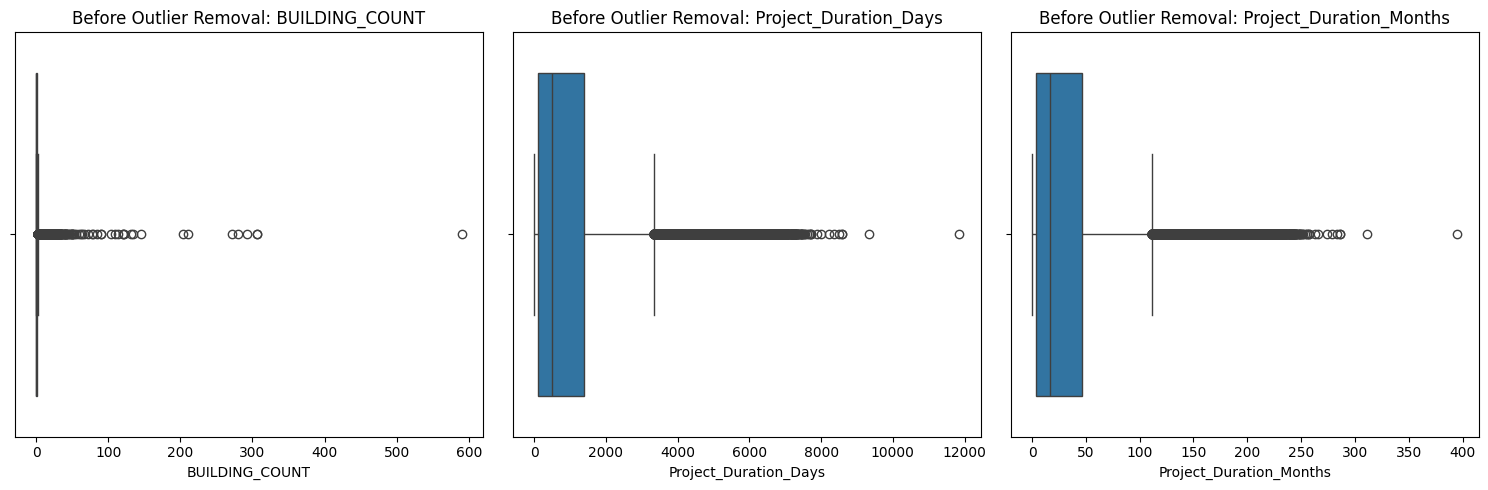

BUILDING_COUNT: Removed 2698 outliers
Project_Duration_Days: Removed 83363 outliers
Project_Duration_Months: Removed 2798 outliers


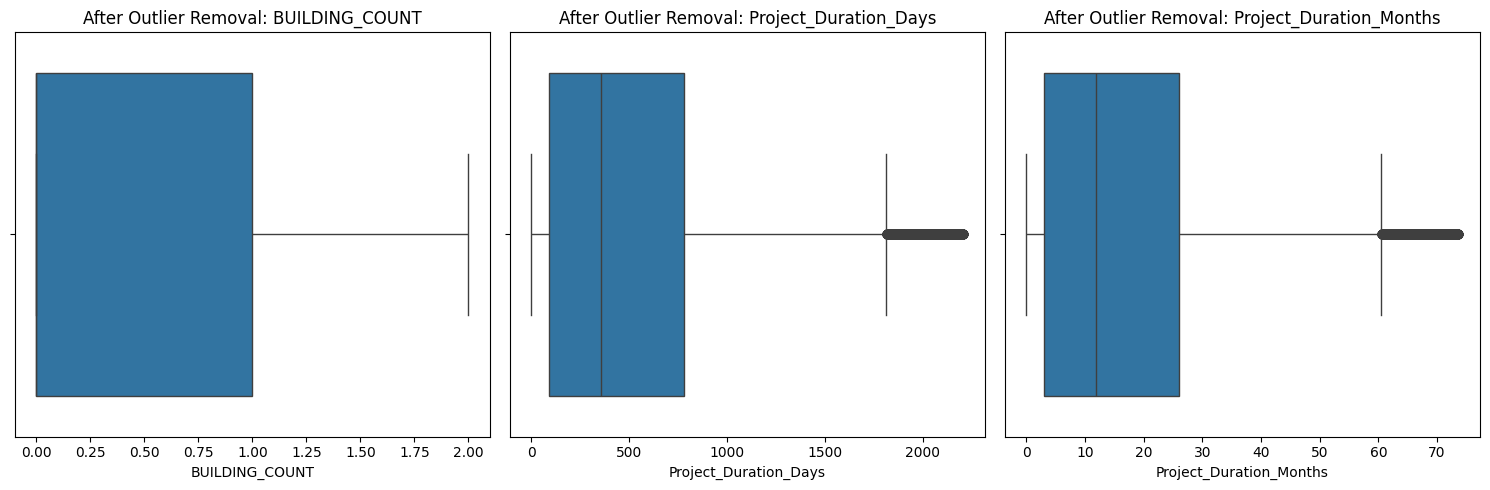

Original Dataset Size: (126481, 16)
Cleaned Dataset Size: (37622, 16)
Cleaned dataset saved as 'cleaned_contractor_projects.csv'


In [24]:

import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ["BUILDING_COUNT", "Project_Duration_Days", "Project_Duration_Months"]

df_outliers = df.copy()

plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df_outliers[col])
    plt.title(f"Before Outlier Removal: {col}")
plt.tight_layout()
plt.show()

def remove_outliers_iqr(df, column):
    """
    Removes outliers from a specific column using the Interquartile Range (IQR) method.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    cleaned_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return cleaned_df

df_clean = df_outliers.copy()

for col in numeric_cols:
    before = df_clean.shape[0]
    df_clean = remove_outliers_iqr(df_clean, col)
    after = df_clean.shape[0]
    print(f"{col}: Removed {before - after} outliers")

plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df_clean[col])
    plt.title(f"After Outlier Removal: {col}")
plt.tight_layout()
plt.show()


print("Original Dataset Size:", df.shape)
print("Cleaned Dataset Size:", df_clean.shape)

df_clean.to_csv("cleaned_contractor_projects.csv", index=False)
print("Cleaned dataset saved as 'cleaned_contractor_projects.csv'")


###### I used the IQR method to remove any extreme values for the BUILDING_COUNT and project duration columns. Box plots were employed prior to and after the cleaning process to demonstrate the improvements achieved. This ensures that all analysis is made on accurate and reliable datasets.

### Distribution of Features

In [25]:
# Summary statistics for numerical features
numeric_cols = ["BUILDING_COUNT", "Project_Duration_Days", "Project_Duration_Months"]

summary_stats = df_clean[numeric_cols].describe(include='all')

print("Summary Statistics for Numeric Features:\n")
display(summary_stats)


Summary Statistics for Numeric Features:



,BUILDING_COUNT,Project_Duration_Days,Project_Duration_Months
count,37622.000000,37622.000000,37622.000000
mean,0.360401,534.848599,17.828287
std,0.507783,558.071598,18.602387
min,0.000000,0.000000,0.000000
25%,0.000000,88.000000,2.933333
50%,0.000000,358.000000,11.933333
75%,1.000000,779.000000,25.966667
max,2.000000,2209.000000,73.633333


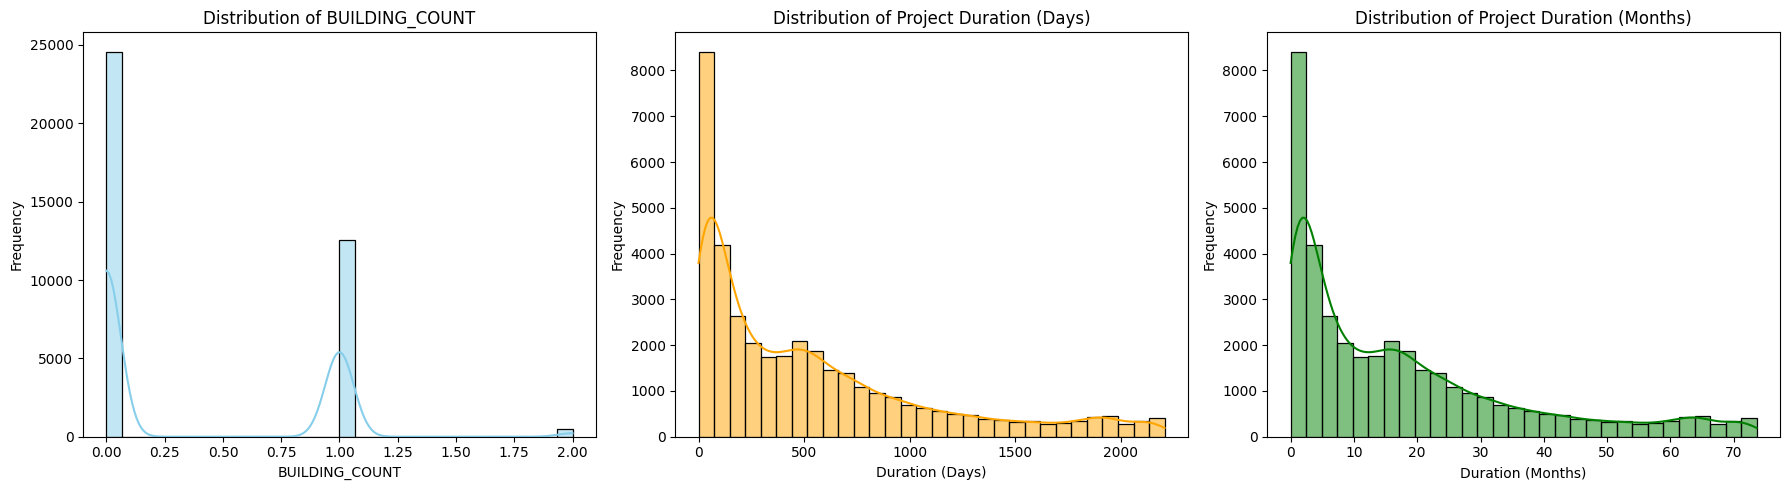

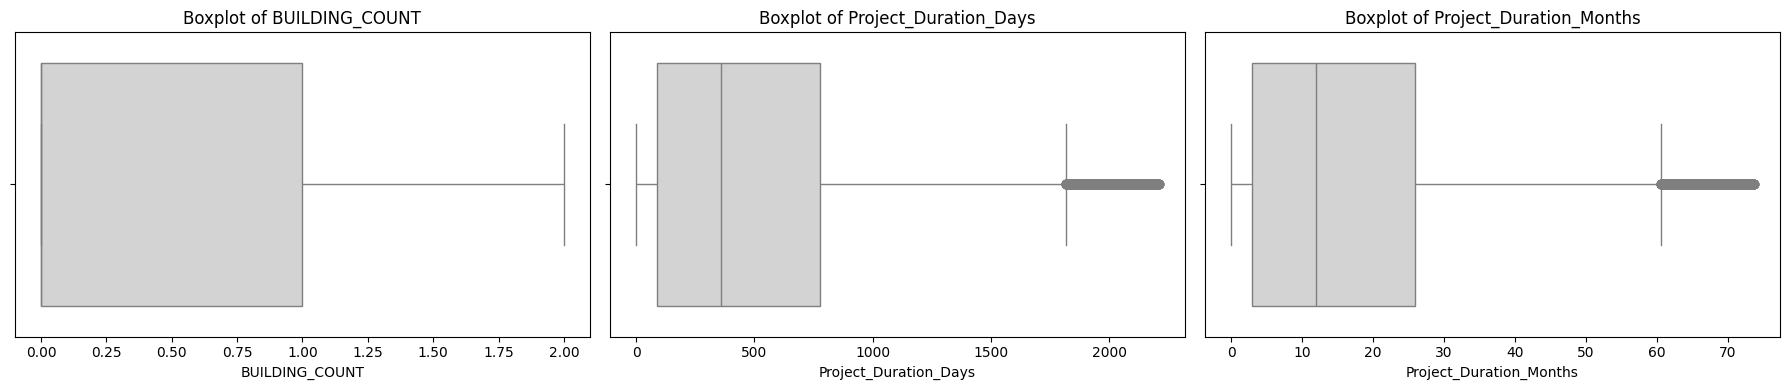

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ["BUILDING_COUNT", "Project_Duration_Days", "Project_Duration_Months"]

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_clean["BUILDING_COUNT"], kde=True, bins=30, color='skyblue')
plt.title("Distribution of BUILDING_COUNT")
plt.xlabel("BUILDING_COUNT")
plt.ylabel("Frequency")

plt.subplot(1, 3, 2)
sns.histplot(df_clean["Project_Duration_Days"], kde=True, bins=30, color='orange')
plt.title("Distribution of Project Duration (Days)")
plt.xlabel("Duration (Days)")
plt.ylabel("Frequency")

plt.subplot(1, 3, 3)
sns.histplot(df_clean["Project_Duration_Months"], kde=True, bins=30, color='green')
plt.title("Distribution of Project Duration (Months)")
plt.xlabel("Duration (Months)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df_clean[col], color="lightgrey")
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()


#### **Description of Distribution of Features**

I analyzed the way this cleaned dataset behaves and concentrated on three important numeric features: BUILDING_COUNT, Project_Duration_Days, and Project_Duration_Months. I utilized histogram-KDE graphs and box plots to explore the shape and variability for all three features.

**1) BUILDING_COUNT**

The histogram depicts a strong right skew here. In this scenario, almost all projects comprise 1 building. Very few observations exist for higher values such as 2+, though some big values were trimmed out during the outlier cleaning process.

**2) Project Duration in Days**

The duration metric is biased towards the days-based one. The distribution is concentrated between 0 and 500 days with declining frequency for longer duration. This is as expected:
smaller projects take less time
Large-scale development is more time-consuming.

**3) Project Duration in Months**

The monthly duration chart is similar to the daily duration chart with respect to the decline. A majority of the projects take approximately 0-18 months to complete, and very few take more than that. It is evidence that the conversion from days to months is correct and that the cleaned dataset represents actual construction duration.

###### Description It can be observed that all three numeric columns feature a right-skewed distribution. This is typical for construction datasets when represented with this scale. Outlier removal helped eliminate impossible values and allowed smooth trends to emerge. In this way, a cleaned dataset was achieved. It represents reality with more small construction projects and fewer large ones. Boxplots confirm the lack of outliers.

# Data Visualisation

### **Distribution of Projects Over Time (Projects Per Year)**

To analyze construction activity trends, I examined how many projects were initiated each year using the permit_year feature. This provides an important time-based distribution that reveals how project volume changes over time and helps identify growth patterns in the construction sector.

The dataset was grouped by year, and the total number of projects for each year was calculated. A line plot was used to visualize these yearly trends.

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set_theme(style="whitegrid")

line_color = sns.color_palette("blend:#7AB,#EDA", n_colors=1)[0]


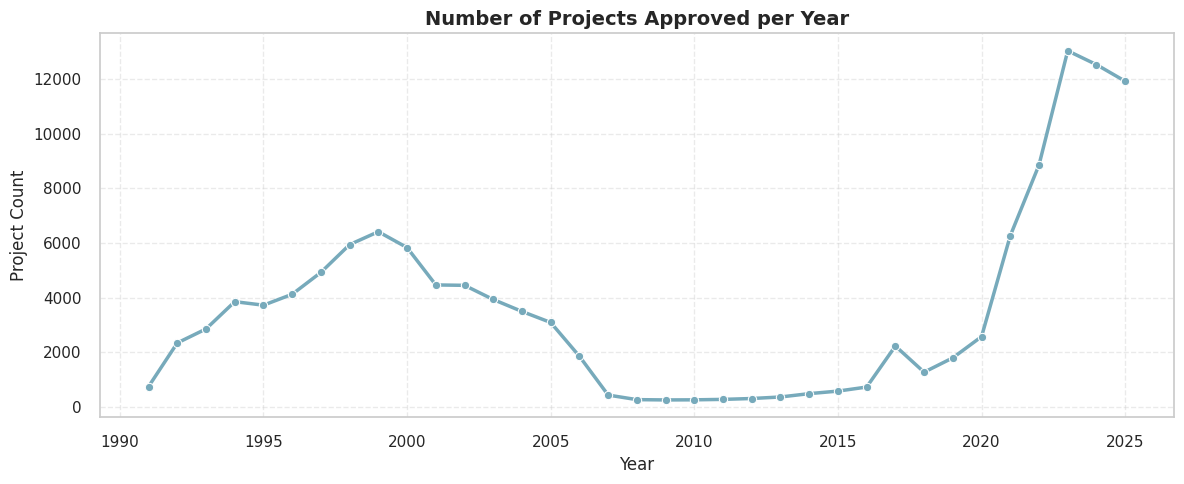

In [28]:
projects_per_year = df.groupby("permit_year").size().reset_index(name="project_count")

plt.figure(figsize=(12,5))
sns.lineplot(
    data=projects_per_year,
    x="permit_year",
    y="project_count",
    marker="o",
    linewidth=2.5,
    color=line_color
)

plt.title("Number of Projects Approved per Year", fontsize=14, weight='bold')
plt.xlabel("Year")
plt.ylabel("Project Count")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


**Insights from the Plot:**

The “Projects Per Year” distribution demonstrates the dynamic nature of construction activity in Dubai. The graph highlights development cycles, growth phases, and potential slow periods, offering valuable context for deeper analysis of contractor performance, building types, or project durations.

### **Distribution of Total Buildings Approved per Year**
With the permit_year feature, I analyzed the yearly distribution of approved buildings in order to learn about construction activity and how it has changed over time in Dubai. It allows showing the temporal view of construction intensity and the long-term development trend.

Below is a line plot showing the total number of buildings approved every year, aggregated by summing the BUILDING_COUNT column for each permit year.

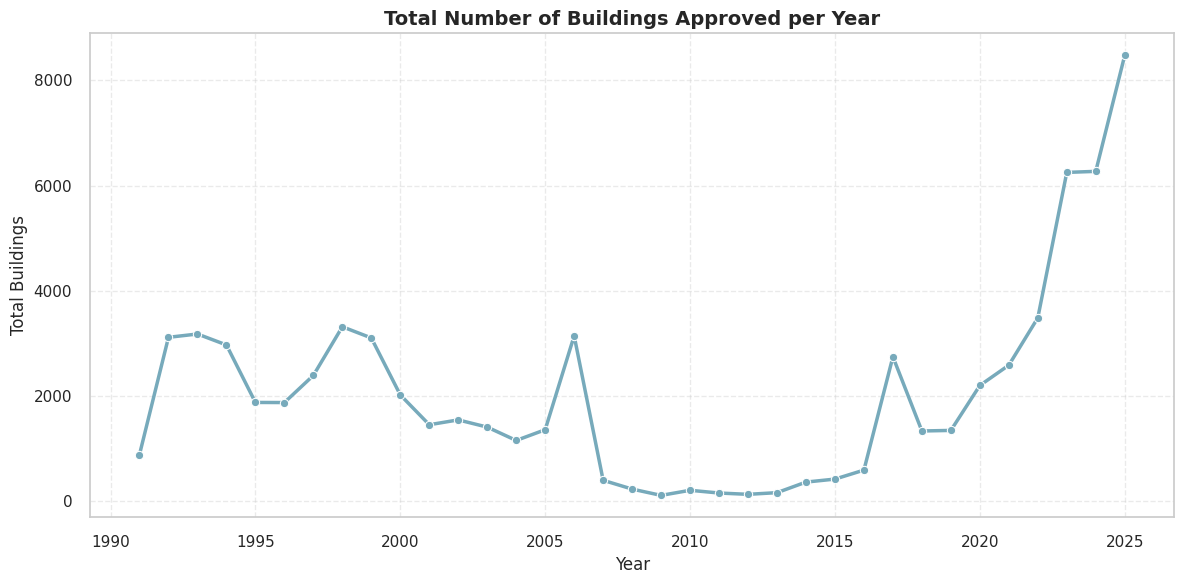

In [29]:
df["permit_year"] = df["FIRST_BUILDING_PERMIT_DATE"].dt.year

yearly_buildings = df.groupby("permit_year")["BUILDING_COUNT"].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(
    data=yearly_buildings,
    x="permit_year",
    y="BUILDING_COUNT",
    marker="o",
    linewidth=2.5,
    color=line_color
)

plt.title("Total Number of Buildings Approved per Year", fontsize=14, weight='bold')
plt.xlabel("Year")
plt.ylabel("Total Buildings")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


**Insights from the Plot:**
This graph of yearly distribution shows a dynamic pattern of construction activity in Dubai, with periods of cyclical development and marked upward growth in recent years. This temporal feature forms an essential context within which to understand the larger urban development landscape and hence forms a substantial contribution to the overall data analysis.

### **Project Status Distribution**

To understand the current state of construction projects, I analyzed the distribution of the PROJECT_STATUS feature. In the cleaned dataset, projects fall into two categories: Open and Closed. This makes the pie chart an effective visualization for showing the proportion of projects that are completed versus those still in progress.


Project Status Distribution:
PROJECT_STATUS
Closed    97947
Open      28534
Name: count, dtype: int64


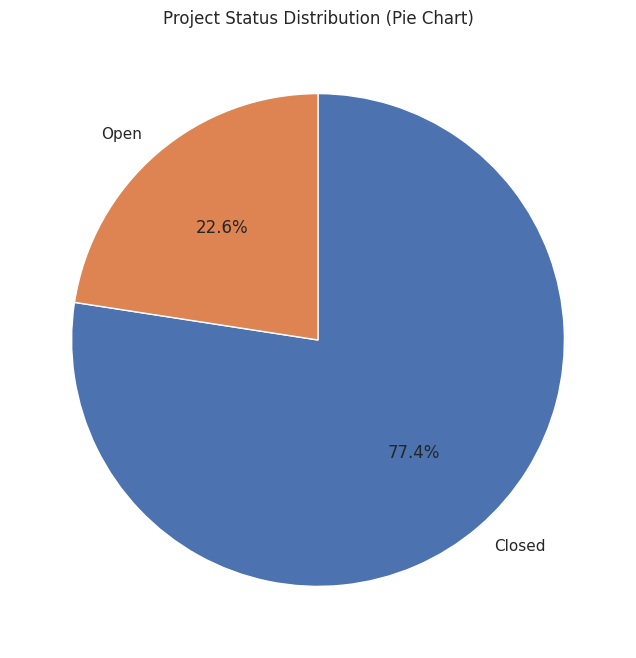

In [30]:
#PROJECT COUNT BY STATUS
status_counts = df["PROJECT_STATUS"].value_counts()
print("\nProject Status Distribution:")
print(status_counts)


plt.figure(figsize=(8,8))
plt.pie(
    status_counts.values,
    labels=status_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False
)
plt.title("Project Status Distribution (Pie Chart)")
plt.show()


# Why a Pie Chart?
# A pie chart is ideal for this feature because:
# The variable is categorical and represents parts of a whole
# It quickly communicates the proportional breakdown of project outcomes
# It provides an intuitive understanding of which statuses dominate the dataset


**Insights from the Plot:**
1. The Majority of Projects Are Closed
Of all the projects in this dataset, about 77.4% are marked as Closed.
The above information indicates that the dataset includes an extensive historical archive of completed construction activities in Dubai.
2. Much of it Remains Open
An estimated 22.6% of the projects are still Open, meaning they are ongoing or active.
This in turn reflects continued development activity and suggests that there is still a large amount of construction projects currently under way.
3. Distinct Operational Visibility

This distribution helps the stakeholders understand:

1. How many projects are completed
2. How many are still active
3. Whether the construction industry is more "completion-heavy" or "growth-heavy" currently

In this dataset, the dominance of Closed projects suggests a mature and well-documented construction cycle, where development is ongoing.


~Conclusion~

The Project Status Distribution shows that, out of all construction projects in this dataset, the majority of construction projects have already been completed, although a meaningful percentage of the projects remains open. This provides a high-level view of the project lifecycle trends and is a good indicator of the current development activity in the region.

## Distribution of Categorical Features (Detailed Analysis)
This section examines the spread of significant categorical variables within the dataset. Countplots were employed to illustrate the frequency of categories, as they effectively demonstrate which project types, building types, contractors, and communities prevail in Dubai’s construction environment.

Each subplot emphasizes the Top categories, facilitating clearer understanding while preventing cluttered visuals.

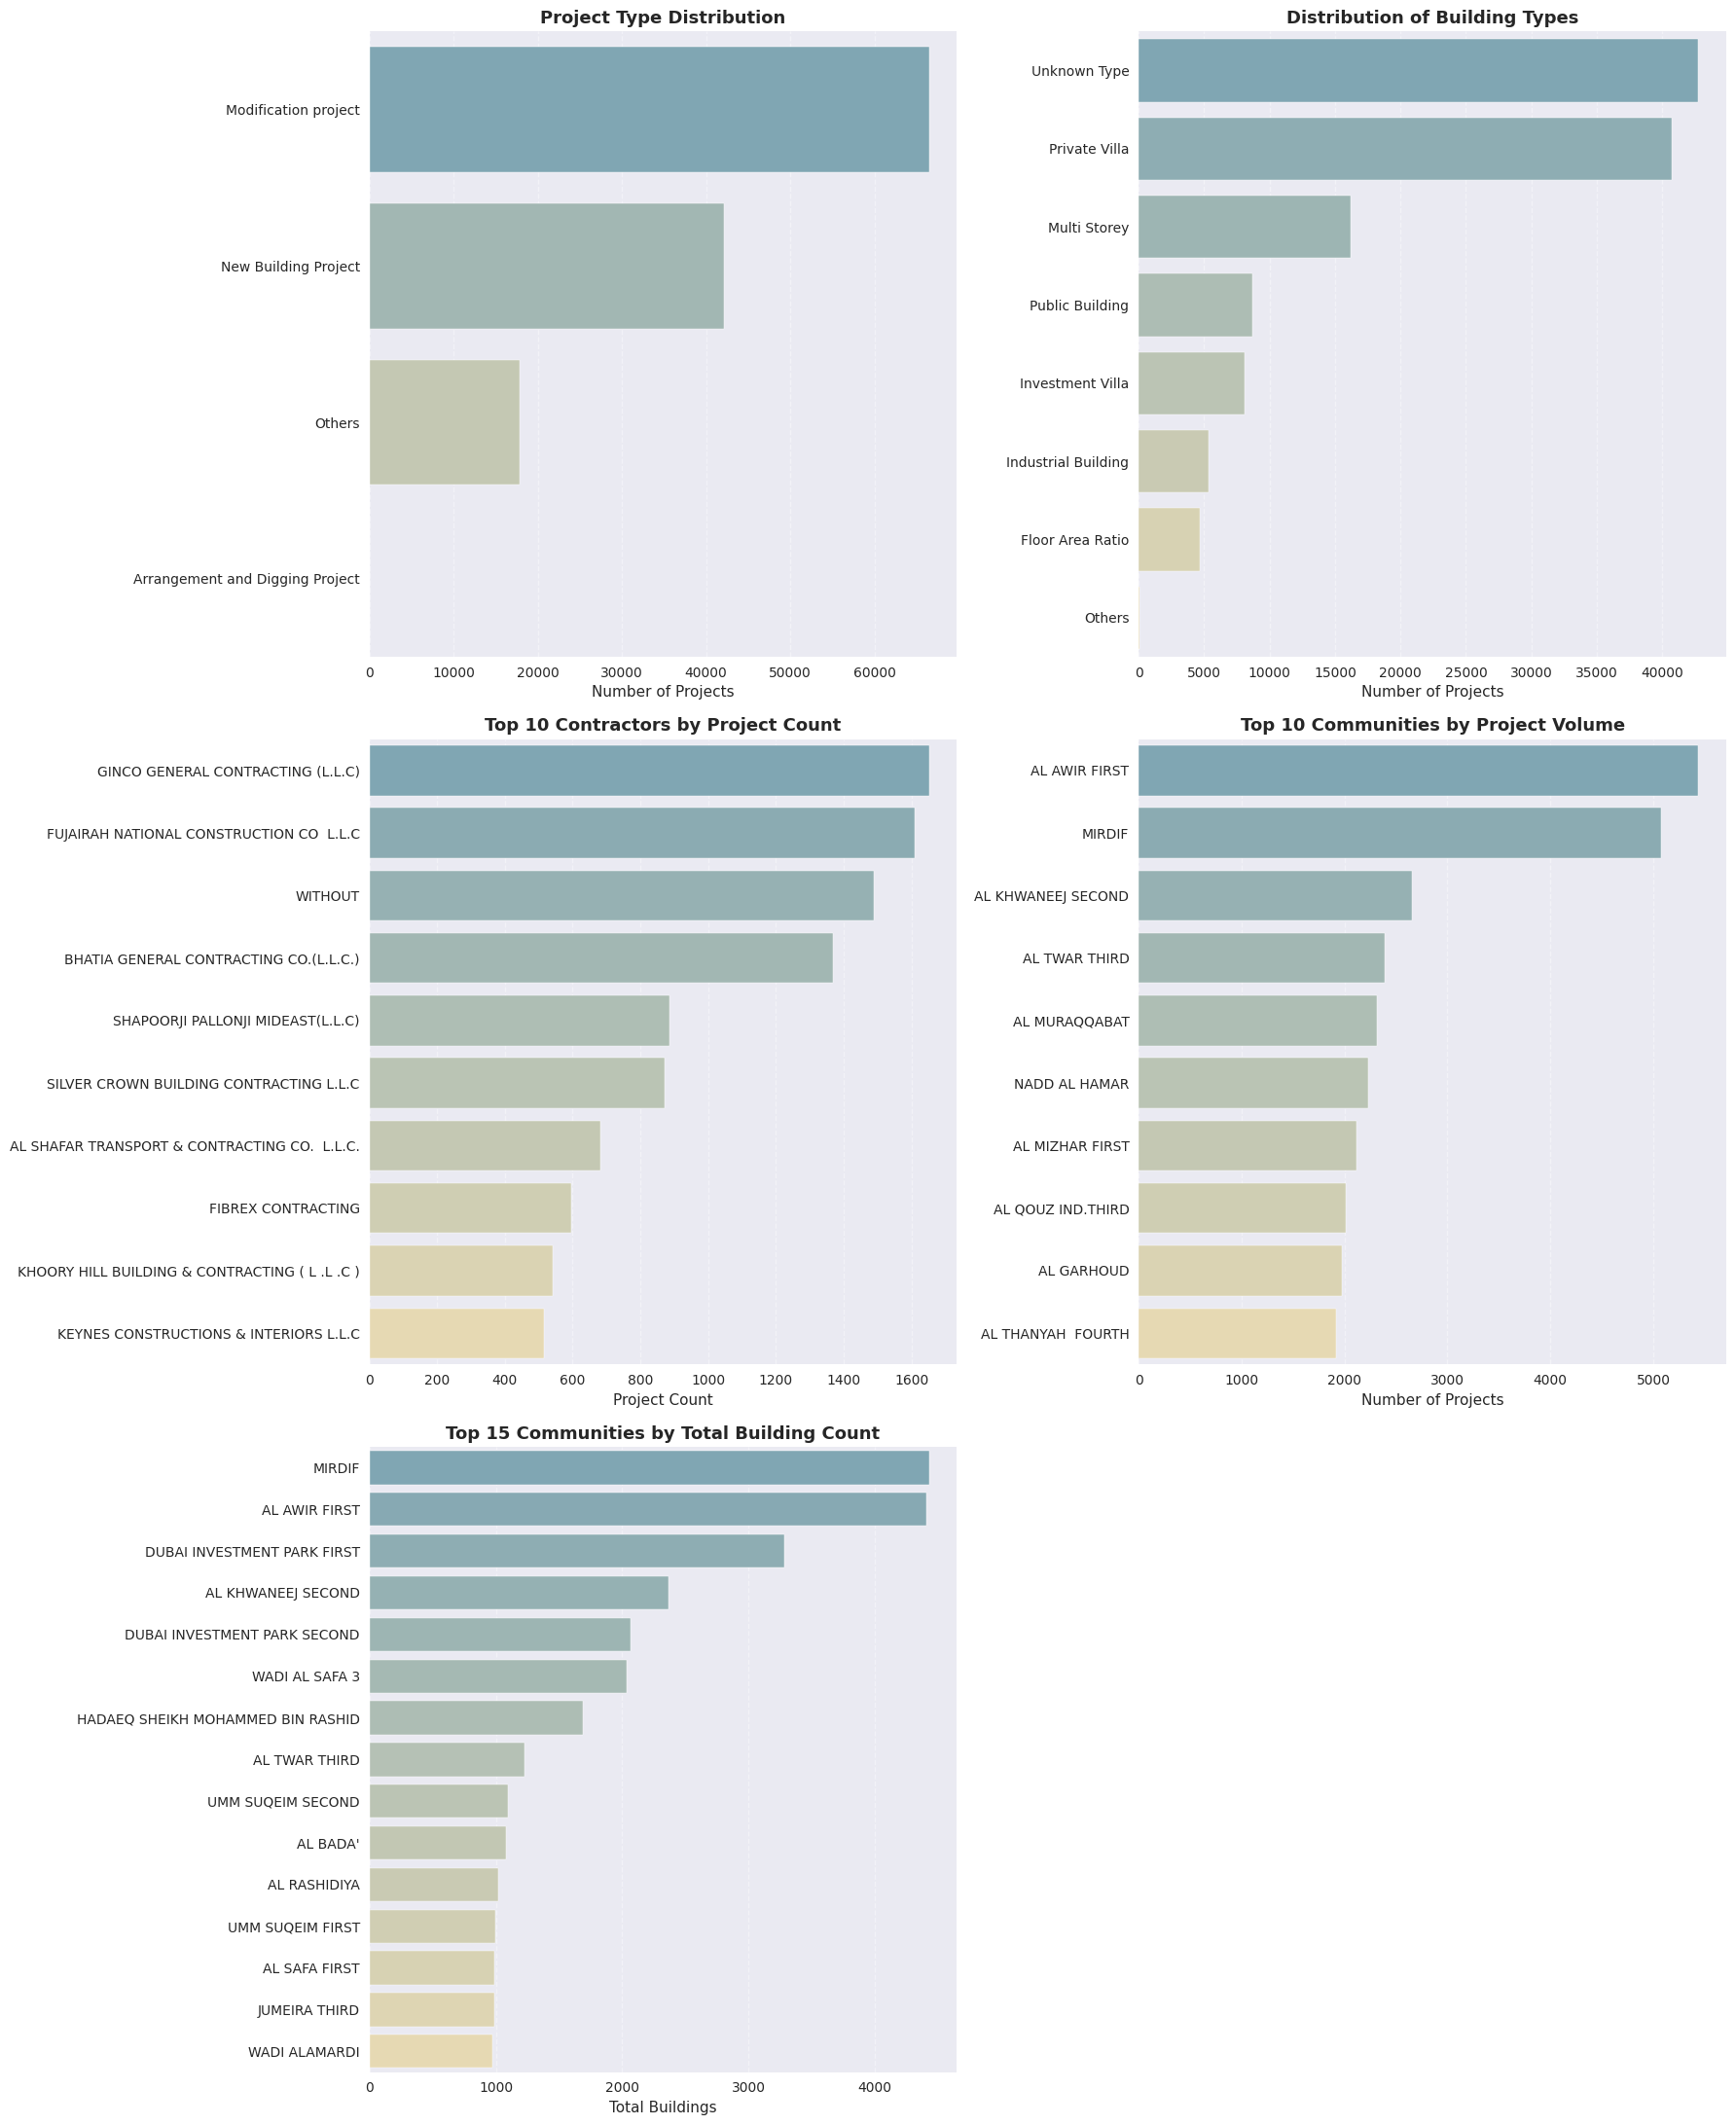

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use("seaborn-v0_8")

def gradient_barplot(ax, y_labels, values, title, xlabel):
    colors = sns.color_palette("blend:#7AB,#EDA", n_colors=len(values))
    sns.barplot(
        ax=ax,
        y=y_labels,
        x=values,
         hue=y_labels,   
        palette=colors,
         legend=False
    )
    ax.set_title(title, fontsize=13, weight='bold')
    ax.set_xlabel(xlabel, fontsize=11)
    ax.set_ylabel("")
    ax.grid(axis='x', linestyle='--', alpha=0.4)


type_counts = df["PROJECT_TYPE"].value_counts()
building_type_counts = df["BUILDING_TYPE"].value_counts()

filtered_contractors = df[df["CONTRACTOR_ENGLISH"] != "Unknown Contractor"]
top_contractors = filtered_contractors["CONTRACTOR_ENGLISH"].value_counts().head(10)

community_counts = df["COMMUNITY_NAME"].value_counts().head(10)

top_comm = (
    df.groupby("COMMUNITY_NAME")["BUILDING_COUNT"]
    .sum()
    .sort_values(ascending=False)
    .head(15)
)


fig, axes = plt.subplots(3, 2, figsize=(18, 22))
axes = axes.flatten()

# Plot 1 
gradient_barplot(
    axes[0],
    type_counts.index,
    type_counts.values,
    "Project Type Distribution",
    "Number of Projects"
)

# Plot 2 
gradient_barplot(
    axes[1],
    building_type_counts.index,
    building_type_counts.values,
    "Distribution of Building Types",
    "Number of Projects"
)

# Plot 3 
gradient_barplot(
    axes[2],
    top_contractors.index,
    top_contractors.values,
    "Top 10 Contractors by Project Count",
    "Project Count"
)

# Plot 4 
gradient_barplot(
    axes[3],
    community_counts.index,
    community_counts.values,
    "Top 10 Communities by Project Volume",
    "Number of Projects"
)

# Plot 5 
gradient_barplot(
    axes[4],
    top_comm.index,
    top_comm.values,
    "Top 15 Communities by Total Building Count",
    "Total Buildings"
)

axes[5].axis("off")

plt.tight_layout()
plt.show()


#### **Insights from the Plot:**
**1. Project Type Distribution**
Type distribution of projects illustrates the most prevalent forms of construction activity.
Certain categories, like modification projects and new building projects, show up far more frequently, reflecting Dubai's emphasis on both maintenance and new development.
This distribution highlights the variety in construction activities and their respective roles in the urban growth of the city.

**2. Building Type Distribution**
Building types differ widely and include villas, warehouses, commercial buildings, and even multistoried buildings.
The most common building types represent typical development patterns in Dubai, including residential expansion and commercial infrastructure projects.
This helps in the identification of primary focus areas of construction across the city.

**3. Top 10 Contractors by Project Count**
The contractor distribution shows that the majority of the projects go to a small group of construction companies.
This concentration suggests strong market dominance and long-term industry presence.
The top contractors listed provide insight into key players and possible performance trends.

**4. Top 10 Communities by Project Volume**
Some communities always find themselves at the top of construction activities.
These areas signify the spots of growth or the development of emerging urban zones.
This distribution lets them know about community-level growth patterns and priorities for development.

**5. Top 15 Communities by Total Building Count**
Unlike the project count, this metric highlights communities with the highest total number of buildings constructed, usually large-scale multi-building developments. Communities with a high total building count most commonly host:
1. Residential clusters
2. Mixed-use developments
3. Large villa compounds
4. High-rise building blocks

#### Overall Interpretation
Using a unified mako-themed grid visualization, the categorical feature distributions illustrate:
1. Robust growth in some communities
2. Dominant contractors leading the market
3. Great variety of building and project types 
4. Distinct trends in construction activity and growth Such insights form a very strong foundation for in-depth predictive modeling, trend analysis, and contractor or community performance evaluation.

These insights build a strong foundation for deeper predictive modeling, trend analysis, and contractor/community performance evaluation.

### Analysis of Overdue Projects

To measure timely and efficient project completion, I examined whether the projects were submitted on time or exceeded their submission deadline. A project is overdue when:

Project status: Open, AND

The LAST_APP_SUBMISSION_DATE has already passed.

This metric provides a clear indication of operational delays, potential approval bottlenecks, or slow project execution by contractors.

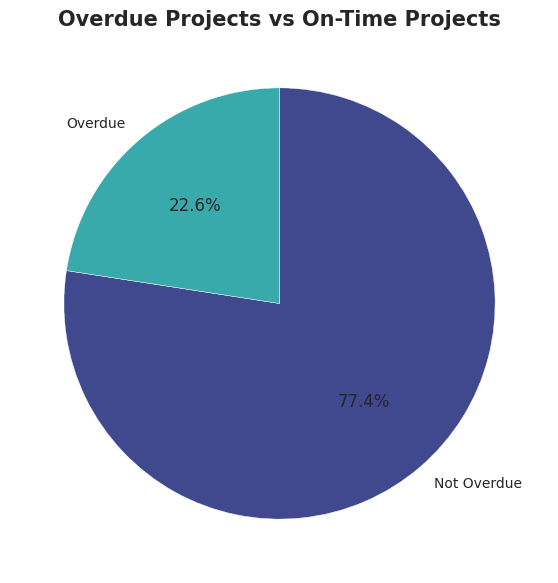

In [32]:
# SIMPLE PIE CHART

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

# Convert date to datetime
df["LAST_APP_SUBMISSION_DATE"] = pd.to_datetime(df["LAST_APP_SUBMISSION_DATE"], errors="coerce")


today = pd.to_datetime(dt.datetime.today().date())

# Calsculate overdue 
df["is_overdue"] = (df["PROJECT_STATUS"] == "Open") & (df["LAST_APP_SUBMISSION_DATE"] < today)

overdue_counts = df["is_overdue"].value_counts()
labels = ["Not Overdue", "Overdue"]

plt.figure(figsize=(7,7))
plt.pie(
    overdue_counts,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90,
    colors=sns.color_palette("mako", 2),
    counterclock=False
)

plt.title("Overdue Projects vs On-Time Projects", fontsize=15, weight="bold")
plt.show()


### **Insights**
1. Some Projects Are Overdue
2. Most Projects Are Submitted On Time
3. Overdue Projects Need Attention

These insights give a view on where improvements operationally are needed.

**Why a Pie Chart?** A pie chart is ideal in such an analysis, since the percentage split between overdue and on-time projects would be clear, which will, in turn, aid a quick view of overall project health. Such representation vividly illustrates the acuteness of overdue work and allows readers to interpret the delay at one glance.

# Relationship Between Categorical Features

### Project Types distributed across the Top 15 Consultants:
To analyse the involvement of consultants in Dubai's construction activity, I constructed a Grouped Bar Chart based on how the Top 15 consultants contribute to different types of projects.
This chart helps to identify which consultants dominate particular project categories and how their work is distributed across the industry.

#### Why Use a Grouped Bar Chart?

It clearly visualises how each consultant contributes to each project type and it allows side-by-side comparison within each project category.
This type of visualization is well-suited to analyzing the relationship between two high-cardinality categorical variables.


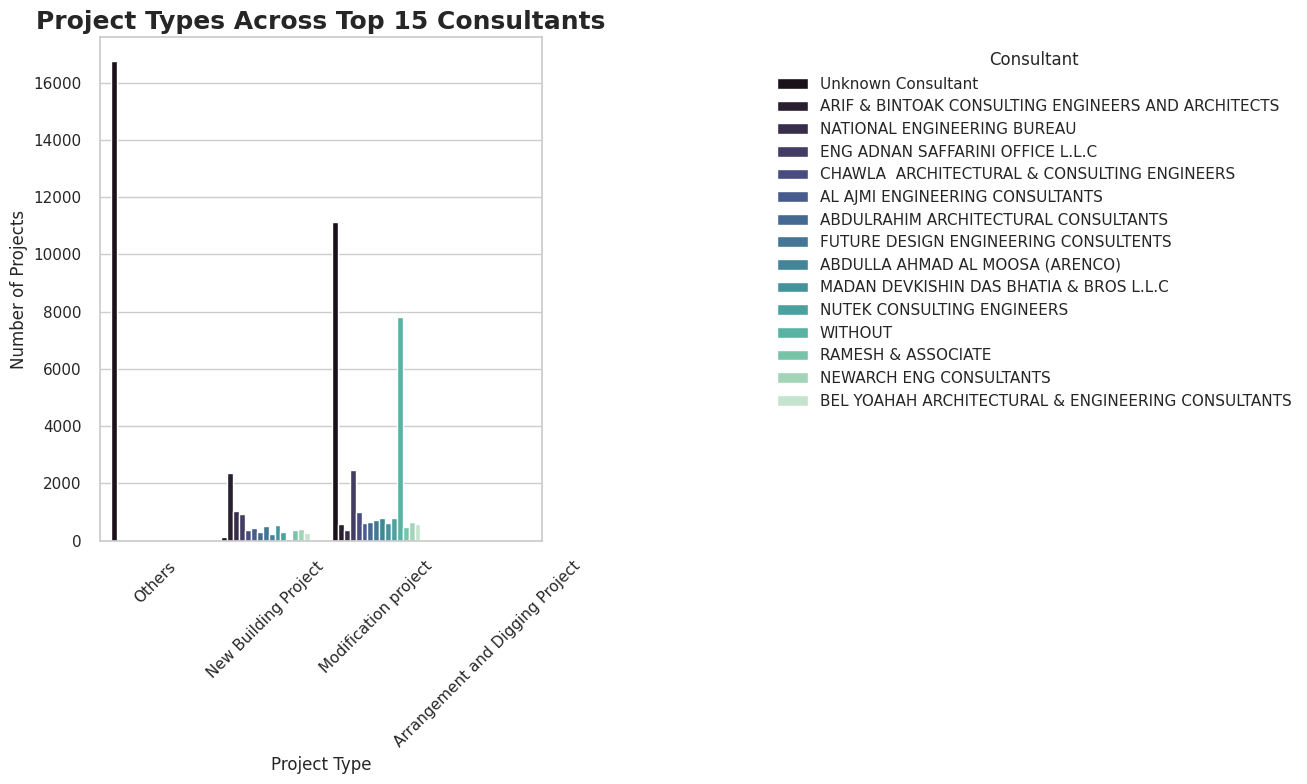

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")
sns.set_theme(style="whitegrid")

# Select Top 10 Consultants
top_consultants = df["CONSULTANT_ENGLISH"].value_counts().head(15).index
filtered_df_consultant = df[df["CONSULTANT_ENGLISH"].isin(top_consultants)]

# Grouped Bar Chart
plt.figure(figsize=(18,8))

sns.countplot(
    data=filtered_df_consultant,
    x="PROJECT_TYPE",
    hue="CONSULTANT_ENGLISH",
    palette="mako"
)

plt.title("Project Types Across Top 15 Consultants", fontsize=18, weight="bold")
plt.xlabel("Project Type", fontsize=12)
plt.ylabel("Number of Projects", fontsize=12)
plt.xticks(rotation=45)

plt.legend(
    title="Consultant",
    bbox_to_anchor=(1.5, 1), 
    loc="upper left"
)

plt.tight_layout()
plt.show()



## Insights from the Grouped Bar Chart
Insights from the Grouped Bar Chart

Indeed, the grouped bar chart indicates that Modification Projects are predominant for most consultants, reflecting Dubai's high demand for renovations, upgrades, and extensions within its continuous redevelopment cycle. On the other hand, New Building Projects are handled only by a small cadre of highly specialized consultants who appear to work on large-scale or high-budget developments, reflective of clear market segmentation. Participation in the other categories such as Arrangement, Digging, and the miscellaneous project types is extremely low, which suggests that these represent niche areas allocated to very few firms.

Overall, the chart shows that the workload is distributed in an unbalanced manner, with a few consultants handling major construction projects while many others work on small to medium-scale modification work. The differences in capabilities, specializations, and strategic market positioning can thus be comprehended through this contrast.
### Summary
Key findings include:
1. Modification Projects dominate the workload for most consultants
2. New Building Projects are concentrated among a smaller, more specialised group
3. Consultant activity varies significantly, highlighting differences in capability and market positioning
4. Certain project types receive very limited consultant involvement

Overall, the chart provides crucial insights into consultant expertise, project distribution, and construction industry dynamics in Dubai.

### The distribution of Project Types across the Top 15 Communities

To understand how construction activity varies between communities in Dubai, I generated a Grouped Bar Chart showing the number of projects for each Project Type across the Top 15 most active communities.

This visualization allows us to compare communities directly and identify construction patterns, development intensity, and dominant project types.

##### Why Use a Grouped Bar Chart?

It allows side-by-side comparison of communities for each project type. Also, it is cleaner and more interpretable than a heatmap when dealing with many categories.Different colors allow each community to be easily identified. Moreover, graph visually communicates which communities are driving most construction activity.

Overall, this graph provides a clear and high-quality representation of multi-category relationships.

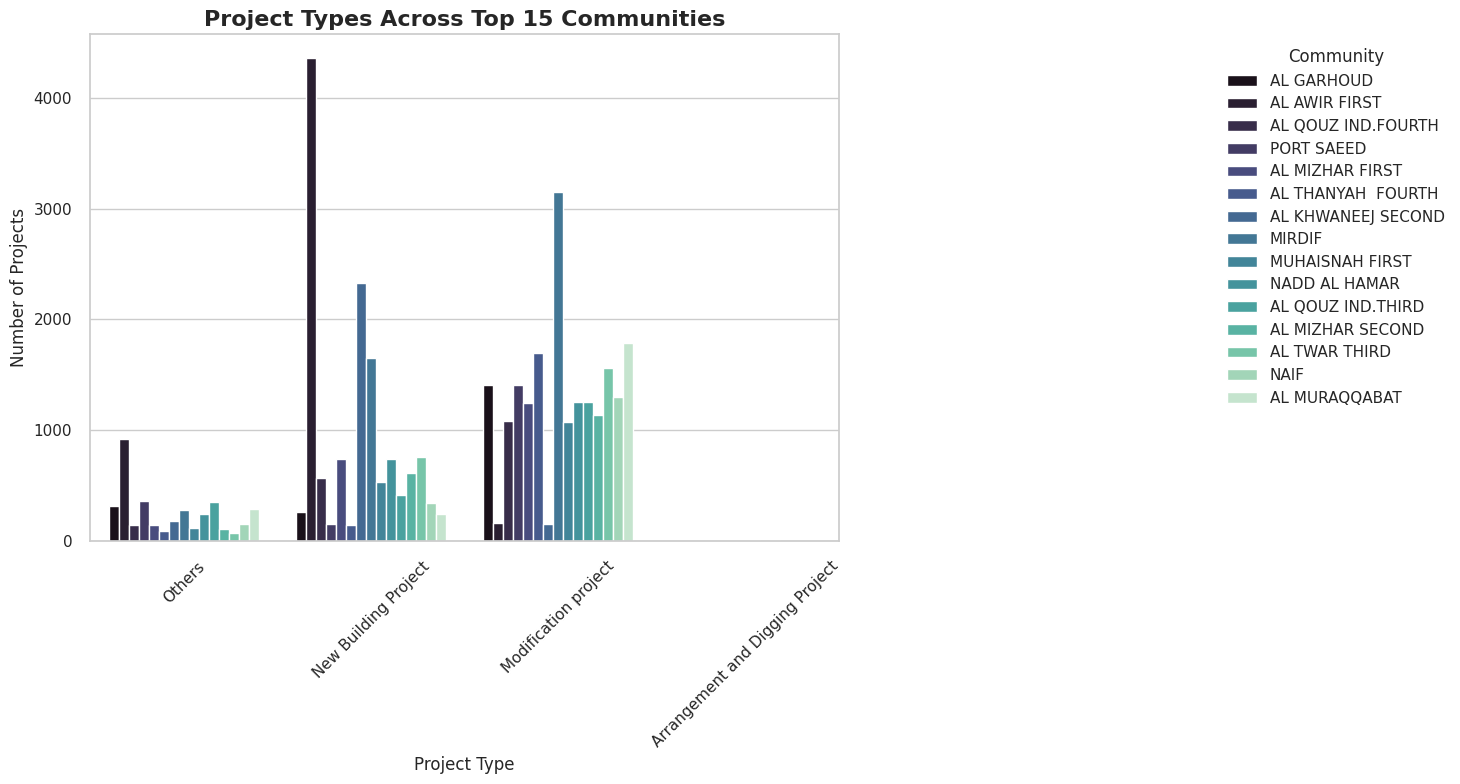

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set_theme(style="whitegrid")


top_communities = df["COMMUNITY_NAME"].value_counts().head(15).index
filtered_df2 = df[df["COMMUNITY_NAME"].isin(top_communities)]

plt.figure(figsize=(18,8))

sns.countplot(
    data=filtered_df2,
    x="PROJECT_TYPE",
    hue="COMMUNITY_NAME",
    palette="mako"
)

plt.title("Project Types Across Top 15 Communities", fontsize=16, weight="bold")
plt.xlabel("Project Type", fontsize=12)
plt.ylabel("Number of Projects", fontsize=12)
plt.xticks(rotation=45)

plt.legend(title="Community", bbox_to_anchor=(1.5, 1), loc="upper left")
plt.tight_layout()
plt.show()


### Summary

The grouped bar chart shows that construction activities are not evenly distributed in Dubai.
Specific communities are leading in development activity: primarily Port Saeed, Al Qusais Industrial Fourth, and Al Mizhar First.


Key takeaways:

1. Redevelopment Projects are predominant in most areas, indicating active redevelopment.
2. New Building Projects show clear hotspots of expansion.
3. Each community has different construction profiles, reflecting diverse dynamics of urban development. This visualization provides a strong understanding of where and what type of construction work is occurring across Dubai's top communities.

This visualization provides a strong understanding of where and what type of construction work is happening across Dubai’s top communities.

### Relationship between the Top 20 Contractors and the Building Types they work on
This analysis seeks to determine the share of construction workload for the top contractors in Dubai and whether or not there is a tendency by some firms to specialize in only certain types of buildings, such as Private Villas, Multi-Storey Buildings, Industrial Buildings, or Public Buildings.

The heat map visualizes how many projects each contractor completed under each building type, highlighting specialization trends and workload patterns.

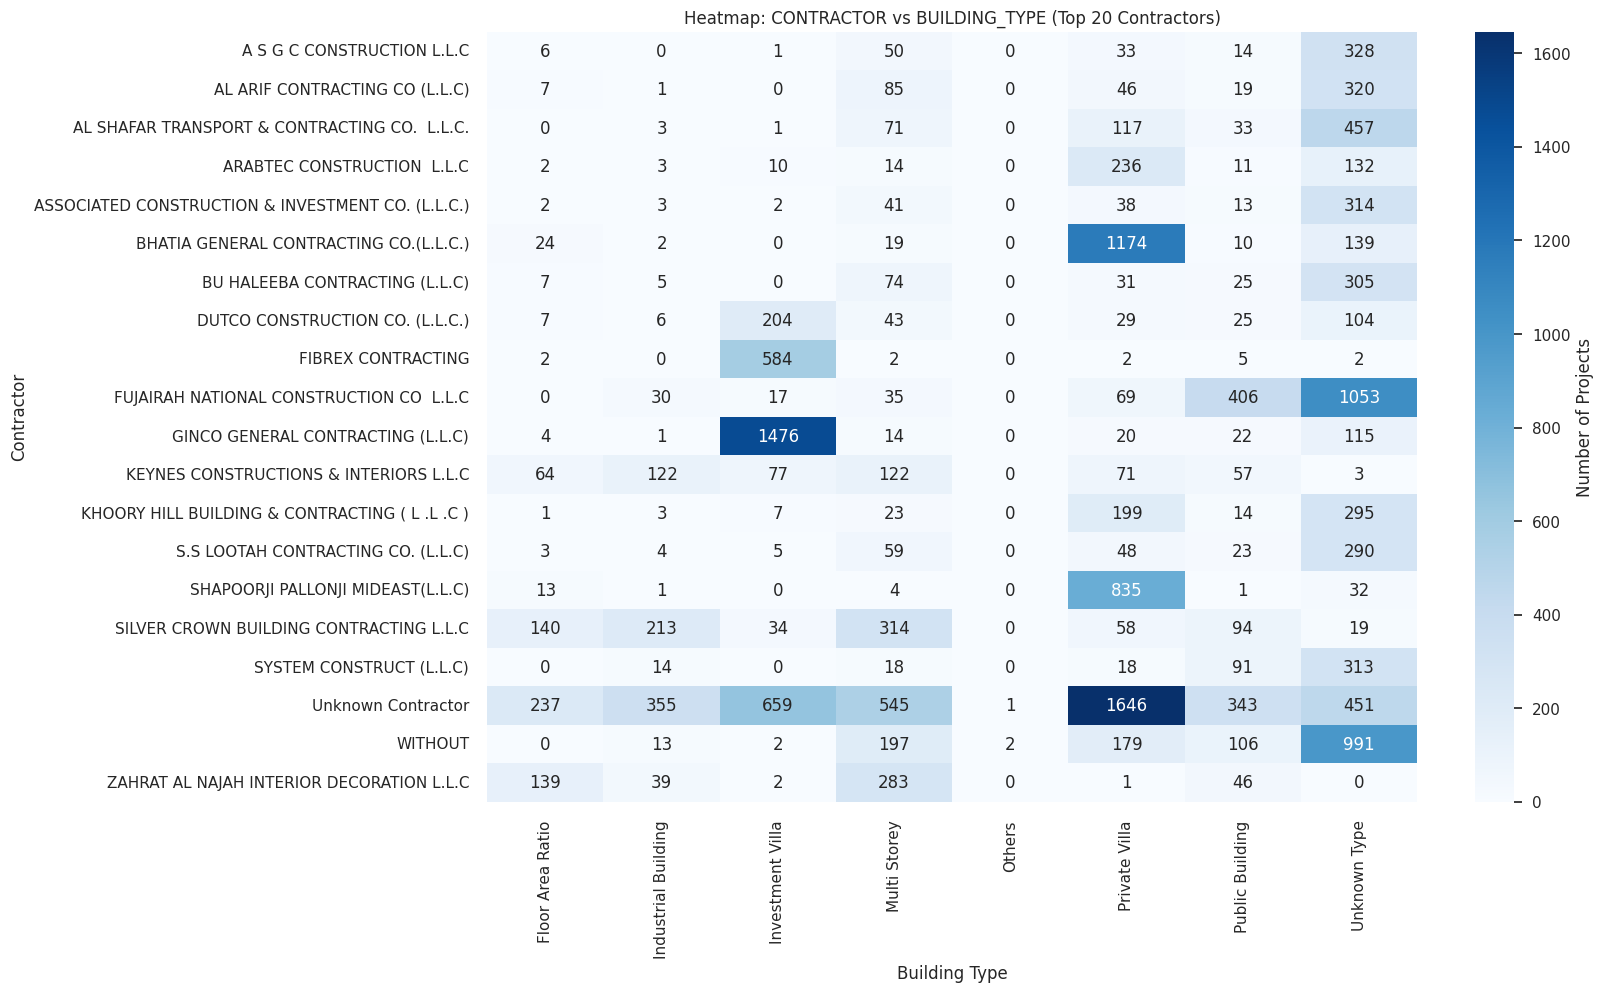

In [35]:
top_contractors = df["CONTRACTOR_ENGLISH"].value_counts().head(20).index
filtered_df3 = df[df["CONTRACTOR_ENGLISH"].isin(top_contractors)]

pivot3 = filtered_df3.pivot_table(
    index="CONTRACTOR_ENGLISH",
    columns="BUILDING_TYPE",
    aggfunc="size",
    fill_value=0
)

plt.figure(figsize=(15, 10))
sns.heatmap(pivot3, cmap="Blues", annot=True, fmt="d", cbar_kws={'label': 'Number of Projects'})
plt.title("Heatmap: CONTRACTOR vs BUILDING_TYPE (Top 20 Contractors)")
plt.xlabel("Building Type")
plt.ylabel("Contractor")
plt.show()


### What the Heatmap Reveals
##### **Contractors Show Strong Specialization in Specific Building Types**

The heatmap clearly shows that contractors are not contributing to all the building categories equally.

Examples:
1. Gingco General Contracting leads in Multi-Storey Buildings with 1476 projects, way above the rest.
2. Bhatia General Contracting is highly specialized in Private Villas, with 1175 projects.
3. Fujairah National Construction has significant activity in Private Villas with 414 projects. This points out that each contractor is inclined to specialize in specific segments, probably due to expertise, licensing, and workforce capabilities, along with long-term developer relationships.

##### **Residential Construction Dominates the Dataset**
The darkest cells mostly appear under:
1. Private Villa
2. Multi-Storey Building

##### **Clear High-Volume Contractors Identified**
The heatmap highlights a few extremely large players:
1. Gingco General Contracting (1476 multi-storey)
2. SILVER CROWN BUILDING CONTRACTING (440 multi-storey)
3. Bhatia General Contracting (1175 private villas)
4. These contractors handle disproportionately large project volumes, suggesting:


##### **Why i rejected Trend Analysis Chart ?**
A trend line chart was not suitable for this analysis because contractors do not follow any natural or sequential order, and therefore a line graph would incorrectly imply continuity or progression over time. Additionally, using a multi-line chart for several building types results in overlapping lines, visual clutter, and difficulty distinguishing meaningful patterns. Since the relationship between contractors and building types is purely categorical rather than temporal, a line chart would misleadingly suggest trends such as growth or decline, which do not exist in this context. In contrast, a heatmap provides a far more accurate and academically appropriate representation, offering a clear visual comparison through color intensity while simultaneously displaying exact numerical values. This makes the heatmap a superior choice for understanding specialization patterns, workload distribution, and overall contractor involvement across different building types.

## Average Project Duration by Community (Top 20)

To estimate project duration, we calculated:
Project Duration (Days)=PROJECT_CLOSING_DATE−FIRST_BUILDING_PERMIT_DATE

/tmp/ipykernel_22/3629909820.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


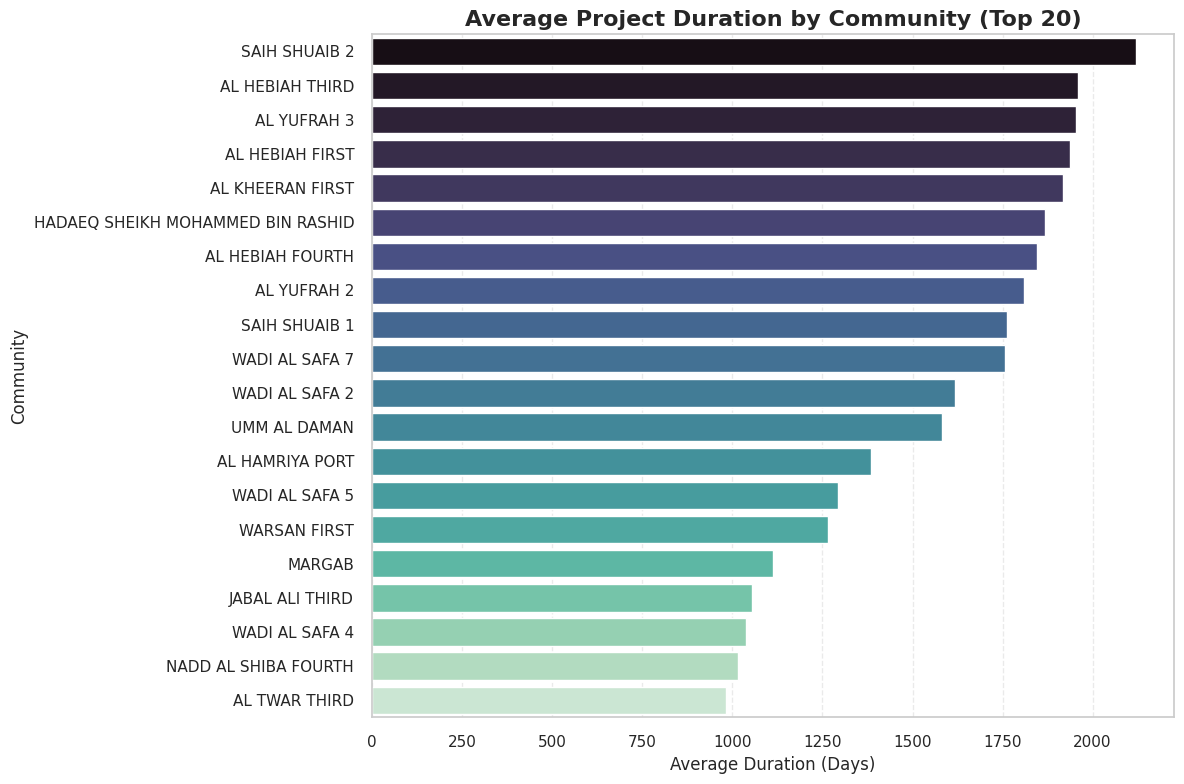

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate average duration per community
avg_duration_comm = (
    df_clean.groupby("COMMUNITY_NAME")["Project_Duration_Days"]
    .mean()
    .sort_values(ascending=False)
    .head(20)
)

plt.figure(figsize=(12,8))
sns.barplot(
    x=avg_duration_comm.values,
    y=avg_duration_comm.index,
    palette="mako"
)

plt.title("Average Project Duration by Community (Top 20)", fontsize=16, weight="bold")
plt.xlabel("Average Duration (Days)")
plt.ylabel("Community")
plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()



Some Communities Have Extremely Long Average Durations
1. Saih Shuaib 4
2. Al Yalayis 2
3. Saih Shuaib 3

Mature Communities Show Moderate Duration
1. Port Saeed
2. Riggat Al Buteen
3. Al Qusais Industrial Area

**Why This Graph?**
Such an analysis is perfectly suitable for a horizontal bar chart, as it gives a clear comparison across several communities of average construction duration while keeping long community names highly readable. The horizontal orientation prevents the crowding of labels, thus cleaning up the chart and making it more accessible.


# Q1. Which project types dominate Dubai’s construction landscape, and what does this imply about development trends?
Modification Projects are most common, followed by New Building Projects, while smaller categories such as Arrangement & Digging Projects appear least.

This suggests that:
- Dubai is in constant redevelopment-upgrading, renovating, and altering its existing structures.
- While new infrastructure is still expanding steadily, maintenance + improvement projects form the core activity.
- Mature yet still growing, the construction industry reflects a balance between new development and enhancement of existing assets.

# Q2. Which contractors and communities handle the highest construction workload, and what patterns are visible?

Based on the categorical visualizations:

**Top Contractors:**
- GINCO General Contracting
- Fujairah National Construction
- Bhatia General Contracting

GINCO dominates multi-storey projects while Bhatia primarily handles private villas, showing clear specialization.

**Top Communities:**
- Al Awir First
- Mirdif
- Al Khawaneej areas

These communities show the highest number of total buildings and project volumes.

**Pattern Observed:**
- Workload is not evenly distributed.
- Contractors have clear specialization areas.
- Some communities are growth hotspots, others show large-scale villa or multi-storey developments.

# Q3. What do the overdue project statistics indicate about construction efficiency and project management in Dubai?
Answer:

From the overdue pie chart:
- 22.6% of projects are overdue, meaning they remain open past their submission deadline.
- 77.4% are on time, showing overall good efficiency.

This indicates:
1. Dubai’s construction ecosystem is largely efficient and deadline-driven.
2. The overdue segment highlights:
- Contractors with slower execution,
- Complex multi-dependency projects,
- Administrative bottlenecks in approvals,
- Specific communities experiencing delays.

This metric helps identify risk zones in operations and potential areas for improvement.

# Conclusion
- This analysis gives deep insight into Dubai's construction landscape using a cleaned, well-structured dataset comprising more than 126,000 records. With proper handling of outliers, duration calculations, and several visualizations that, in turn, bring forth clear patterns:
- Modification projects dominate Dubai's construction ecosystem, revealing continuous cycles of redevelopment.
- The major contractors are strongly specialized: some firms dominate multi-storey buildings, whereas others concentrate almost exclusively on villas.
- Top communities such as Al Awir First and Mirdif show high project volumes, indicating active expansion zones.
- Most projects are delivered on time, reflecting efficiency, but the overdue projects reflect operational challenges.
- Time-series trends give evidence of steady growth in building approvals, therefore supporting Dubai's rapid and continuous development.

Overall, the dataset provides useful information on contractor performance, community development trends, and project efficiency that could drive decision-making for planning and resource allocation, as well as policy development.

# Limitations
- Missing closing dates: More than 47,000 projects lack a closing date, thus precise duration calculations for many records are limited.
- Unknown contractor/consultant labels: Although removed when both were unknown, many single missing values still reduce analytical depth.
- Duration estimation: Approximation of days to months by dividing by 30 is a very rough estimate and may not reflect the exact project duration in months.
- No financial/cost data Efficiency cannot be related to budget performance without cost information.
- Outlier removal decreases dataset size. IQR filtering removed large amounts of data, keeping only 37,622 rows. This removes valid large-scale projects. - - - - Static dataset Represents a snapshot-not real-time project movement.

## Methodology Overview
### Tools and Libraries Used

#### Pandas
- Used as the primary library for data cleaning, manipulation, and preprocessing.
- Enabled efficient loading of the dataset and execution of operations such as filtering, grouping, merging, and handling missing values.

#### NumPy
- Assisted with mathematical operations such as calculating duration, replacing invalid values, and managing NaNs.
- Used to apply numerical transformations when generating new computed features.

#### Matplotlib & Seaborn

1. Used for creating visualizations to understand distributions, correlations, and categorical relationships.
2. Seaborn’s themes (e.g., mako, Blues) enhanced readability and presentation quality.
3. **Enabled creation of:**
- Boxplots (for outlier detection)
- Line charts (time trends)
- Bar charts (categorical distributions)
- Heatmaps (categorical relationships)
- Pie charts (status and overdue proportions)